In [40]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.7.0


In [41]:
Credit_data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/data_fin.csv')
Credit_data.head()

,Period,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
0,1/4/2015,1,663157.59,39789.47,413934.99,24836.09,0.00,14953.38,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,62099,1,1,1,0
1,1/4/2015,1,51800.00,3108.00,70809.87,4304.78,1196.78,0.00,0.0,0.00,3299869.92,0.0,0.00,0.00,0.0,0.0,0.0,33120,2,1,1,0
2,1/4/2015,1,3905825.43,234349.54,44486.35,2669.19,0.00,231680.35,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,20111,2,1,1,1
3,1/4/2015,1,484.91,29.09,0.00,0.00,0.00,29.09,50.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,46496,3,1,2,0
4,1/4/2015,1,178932.65,10735.96,136709.76,8202.59,0.00,2533.37,13020.0,1250455.44,0.00,0.0,299253.43,17955.21,0.0,0.0,0.0,22209,2,1,1,0


In [42]:
Credit_data.tail()

,Period,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
2554606,1/10/2018,3,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43211,6,2,3,0
2554607,1/10/2018,3,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56210,13,2,1,0
2554608,1/10/2018,3,1300.00,0.0,123.50,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2202,10,1,1,1
2554609,1/10/2018,3,731934.57,0.0,77601.72,0.0,0.0,0.0,5530.43,0.0,1264.0,0.0,0.0,0.0,0.0,0.0,0.0,47612,3,1,1,0
2554610,1/10/2018,3,1095.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31001,2,1,1,0


# Exploratory data Analysis

In [43]:
Credit_data.shape

(2554611, 22)

In [44]:
Credit_data.isnull().sum()

Period    0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
Class     0
dtype: int64

In [45]:
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554611 entries, 0 to 2554610
Data columns (total 22 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Period  object 
 1   V2      int64  
 2   V3      float64
 3   V4      float64
 4   V5      float64
 5   V6      float64
 6   V7      float64
 7   V8      float64
 8   V9      float64
 9   V10     float64
 10  V11     float64
 11  V12     float64
 12  V13     float64
 13  V14     float64
 14  V15     float64
 15  V16     float64
 16  V17     float64
 17  V18     int64  
 18  V19     int64  
 19  V20     int64  
 20  V21     int64  
 21  Class   int64  
dtypes: float64(15), int64(6), object(1)
memory usage: 428.8+ MB


Text(0.5, 1.0, 'Class Vs. Count')

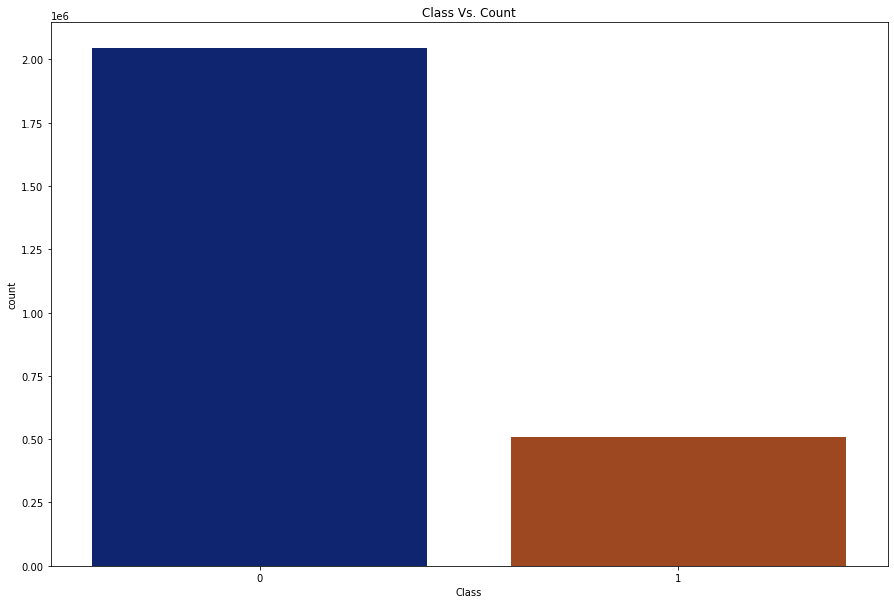

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(x="Class", data=Credit_data , palette="dark")
plt.title('Class Vs. Count')

Text(0.5, 1.0, 'Piechart showing distribution of Class in the Dataset')

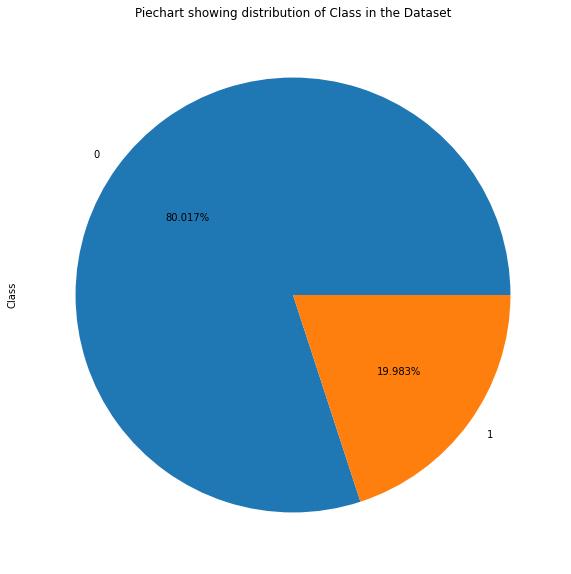

In [47]:
piedata = Credit_data['Class']
plt.figure(figsize=(15,10))
piedata.value_counts().plot(kind = 'pie',autopct = '%.3f%%')
plt.title('Piechart showing distribution of Class in the Dataset')

In [48]:
Credit_data['Class'].value_counts()

0    2044123
1     510488
Name: Class, dtype: int64

# Splitting the data into train and test set

In [49]:
X = Credit_data.drop(['Class','Period'], axis = 1)
y = Credit_data['Class']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1788227, 20)
(766384, 20)
(1788227,)
(766384,)


In [52]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

# Reshaping inputs to feed to Convolution Neural Network

In [53]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [54]:
print(X_train.shape) 
print(X_test.shape)

(1788227, 20, 1)
(766384, 20, 1)


# Defining the CNN Architecture

In [55]:
model = Sequential()
model.add(Conv1D(128, 2, activation='relu', kernel_initializer='he_normal',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv1D(64, 2, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 19, 128)           384       
                                                                 
 batch_normalization_9 (Batc  (None, 19, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_13 (Dropout)        (None, 19, 128)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 18, 64)            16448     
                                                                 
 batch_normalization_10 (Bat  (None, 18, 64)           256       
 chNormalization)                                                
                                                                 
 dropout_14 (Dropout)        (None, 18, 64)           

## Plot the Model

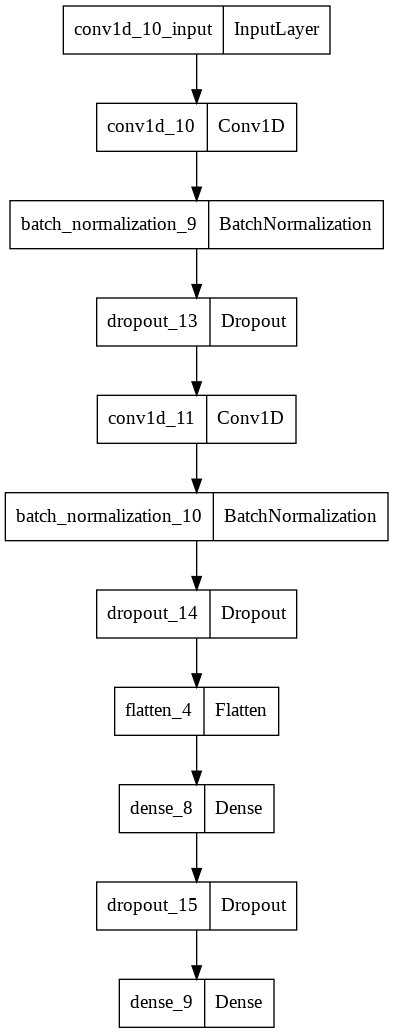

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(model)

## Model Training

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=512, epochs=30, verbose=1, validation_data=(X_test,y_test))

Epoch 1/30
3493/3493 [==============================] - 346s 99ms/step - loss: 0.3836 - accuracy: 0.8374 - val_loss: 0.3759 - val_accuracy: 0.8397
Epoch 2/30
3493/3493 [==============================] - 334s 96ms/step - loss: 0.3768 - accuracy: 0.8387 - val_loss: 0.3750 - val_accuracy: 0.8409
Epoch 3/30
3493/3493 [==============================] - 336s 96ms/step - loss: 0.3753 - accuracy: 0.8391 - val_loss: 0.3899 - val_accuracy: 0.8385
Epoch 4/30
3493/3493 [==============================] - 338s 97ms/step - loss: 0.3742 - accuracy: 0.8395 - val_loss: 0.3688 - val_accuracy: 0.8417
Epoch 5/30
3493/3493 [==============================] - 337s 96ms/step - loss: 0.3730 - accuracy: 0.8399 - val_loss: 0.3788 - val_accuracy: 0.8389
Epoch 6/30
3493/3493 [==============================] - 331s 95ms/step - loss: 0.3721 - accuracy: 0.8400 - val_loss: 0.3685 - val_accuracy: 0.8430
Epoch 7/30
3493/3493 [==============================] - 332s 95ms/step - loss: 0.3716 - accuracy: 0.8404 - val_loss: 0

In [60]:
predictions=model.predict(X_test)
predictions

array([[0.07590652],
       [0.02372006],
       [0.06778112],
       ...,
       [0.0785445 ],
       [0.48833102],
       [0.12969106]], dtype=float32)

## Saving the Model

In [61]:
model.save('/content/drive/MyDrive/CreditCard_CNN.h5')
path='/content/drive/MyDrive/CreditCard_CNN.h5'
model=tf.keras.models.load_model((path))

predictions=model.predict(X_test)
predictions

array([[0.07590652],
       [0.02372006],
       [0.06778112],
       ...,
       [0.0785445 ],
       [0.48833102],
       [0.12969106]], dtype=float32)

In [62]:
predictions = predictions.round().astype('int')
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## Accuracy

In [65]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Acc=accuracy_score(y_test,predictions)
print('The accuracy of model on test set is:',  Acc)

The accuracy of model on test set is: 0.8450985406793461


## Confusion Matrix

In [66]:
CM=confusion_matrix(y_test,predictions)
print(CM)

[[576324  36913]
 [ 81801  71346]]


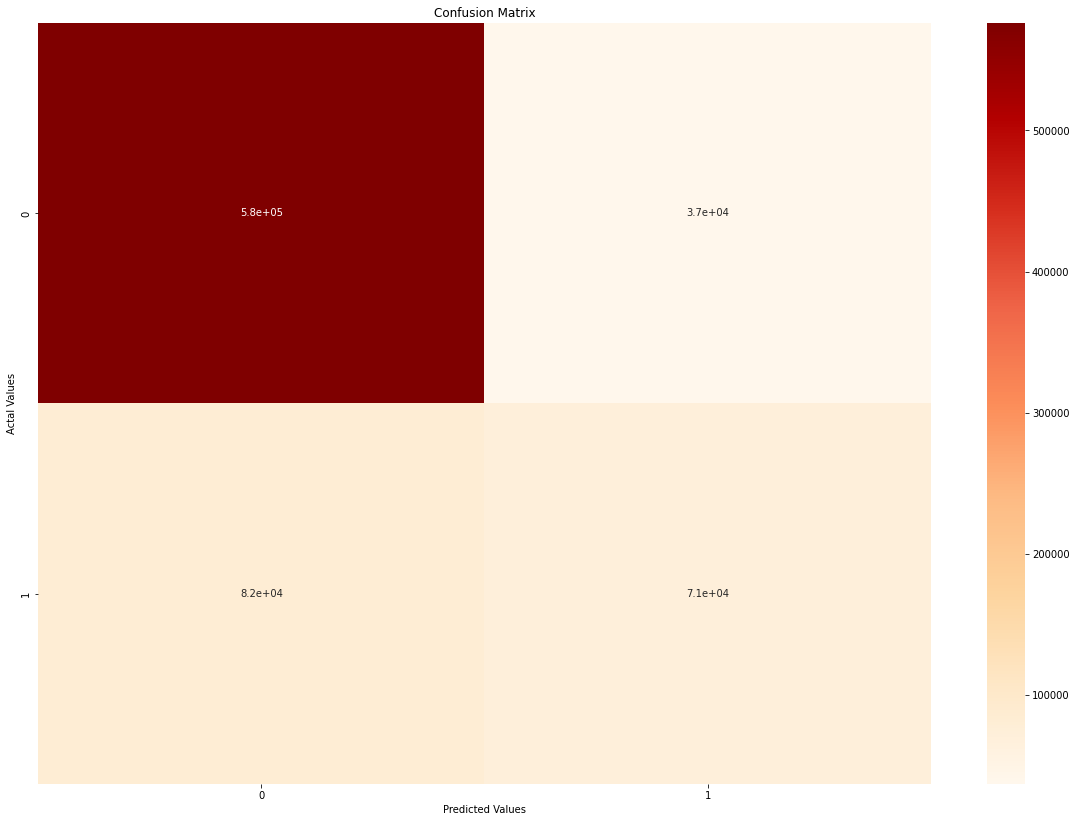

In [67]:
%matplotlib inline
CM_df = pd.DataFrame(CM,index = ['0','1'], columns = ['0','1'])
plt.figure(figsize=(20,14))
sns.heatmap(CM_df, annot=True, cmap="OrRd")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Classification Report

In [68]:
CR=classification_report(y_test,predictions)
print(CR)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91    613237
           1       0.66      0.47      0.55    153147

    accuracy                           0.85    766384
   macro avg       0.77      0.70      0.73    766384
weighted avg       0.83      0.85      0.83    766384

